<a href="https://colab.research.google.com/github/YasinnSoylu/IsolationForest-pycaret-Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Card Fraud Detection using PyCaret

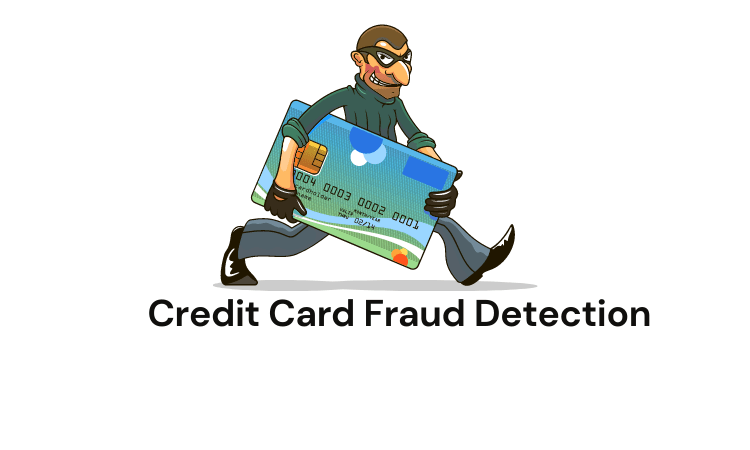

## In this notebook we will perform the following task: 
- Data Analysis
- Feature Engineering
- Model Building and Prediction using ML Techniques
- Model Building and Prediction using PyCaret(Auto ML)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest


### Importing Libraries for Outlier Detection

### Reading our Dataset

In [3]:
df= pd.read_csv("creditcard.csv")
df.dropna(inplace=True)

In [7]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [12]:
columns = df.columns.tolist()
# Making our Independent Features
columns = [var for var in columns if var not in ["Class"]]
# Making our Dependent Variable
target = "Class"
X= df[columns]
y= df[target]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Isolation Forest

#### One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

#### This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

#### Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

#### How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

#### The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation

In [19]:
iso_forest= IsolationForest(n_estimators=100, max_samples=len(x_train),random_state=0, verbose=0)                        

In [20]:
iso_forest.fit(x_train,y_train)

IsolationForest(max_samples=199364, random_state=0)

In [21]:
ypred= iso_forest.predict(x_test)

#### Mapping the values as we want to have an output in 0 and 1

In [22]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1


### Accuracy score and Matrix

In [23]:
print(accuracy_score(y_test,ypred))

0.9978465175614152


In [24]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.37      0.51      0.43       136

    accuracy                           1.00     85443
   macro avg       0.69      0.76      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, ypred)

array([[85189,   118],
       [   66,    70]])

### We can also print how many errors our model have

In [27]:
n_errors = (ypred != y_test).sum()
print("Isolation Forest have {} errors.".format(n_errors))

Isolation Forest have 184 errors.


# PyCaret :

### PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

### Installing Pycaret

In [28]:
# !pip install pycaret
# !pip uninstall scikit-learn
# !pip install scikit-learn==0.23.2

In [29]:
df= pd.read_csv("creditcard.csv")

In [30]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
from pycaret.classification import *

In [32]:
model= setup(data= df, fold_shuffle=True, target= 'Class')

,Description,Value
0,session_id,6101
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [33]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9994,0.9032,0.7713,0.8706,0.8166,0.8163,0.8185,1.324
dt,Decision Tree Classifier,0.9992,0.8796,0.7595,0.7738,0.7660,0.7656,0.7659,27.934
lr,Logistic Regression,0.9991,0.9402,0.6277,0.8371,0.7160,0.7156,0.7237,11.524
ridge,Ridge Classifier,0.9988,0.0000,0.4021,0.8413,0.5404,0.5400,0.5789,0.287
knn,K Neighbors Classifier,0.9983,0.5968,0.0382,0.5667,0.0712,0.0710,0.1447,5.196
dummy,Dummy Classifier,0.9983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.365
svm,SVM - Linear Kernel,0.9981,0.0000,0.0088,0.0467,0.0136,0.0133,0.0184,13.300
nb,Naive Bayes,0.9929,0.9620,0.6337,0.1444,0.2348,0.2326,0.2999,0.264
qda,Quadratic Discriminant Analysis,0.9757,0.9656,0.8680,0.0583,0.1093,0.1064,0.2214,0.792


INFO:logs:create_model_container: 9
INFO:logs:master_model_container: 9
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [35]:
model= create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9993,0.8822,0.7059,0.8571,0.7742,0.7738,0.7775
1,0.9993,0.8969,0.7353,0.8621,0.7937,0.7933,0.7958
2,0.9994,0.9263,0.8235,0.8235,0.8235,0.8232,0.8232
3,0.9993,0.8713,0.7429,0.8667,0.8000,0.7997,0.8021
4,0.9994,0.9411,0.7941,0.8710,0.8308,0.8305,0.8314
5,0.9995,0.8676,0.7353,0.9615,0.8333,0.8331,0.8406
6,0.9994,0.8823,0.7353,0.8929,0.8065,0.8062,0.8100
7,0.9994,0.9410,0.8235,0.8235,0.8235,0.8232,0.8232
8,0.9993,0.8969,0.7647,0.8125,0.7879,0.7875,0.7879


INFO:logs:create_model_container: 10
INFO:logs:master_model_container: 10
INFO:logs:display_container: 3
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


### As we see we have a very good Kappa score which is often seen in an Imbalanced dataset

## Predictions

In [36]:
pred_holdout = predict_model(model,data= x_test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


In [37]:
pred_holdout

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Label,Score
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1,1.0
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0,1.0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0,1.0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0,1.0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180795,124702.0,-0.673320,1.823100,-2.152665,-1.051308,1.822568,1.319646,-0.228012,-1.743339,-0.665095,...,-0.929823,0.561185,2.970343,-0.632171,0.095316,0.031770,0.093565,3.99,0,1.0
259979,159354.0,2.125553,-0.065046,-1.537467,0.125578,0.500319,-0.359530,0.124248,-0.201678,0.551045,...,-0.878330,0.281129,0.035931,-0.173013,0.207555,-0.075438,-0.060078,1.79,0,1.0
21885,31911.0,0.746800,-1.028053,1.127833,1.631418,-1.193487,0.946088,-0.857322,0.480905,1.662617,...,0.058198,-0.235697,-0.457910,0.328226,-0.219767,0.058352,0.058441,195.60,0,1.0
217812,141043.0,2.080547,0.167780,-1.722107,0.403323,0.451991,-0.848388,0.190703,-0.239152,0.481197,...,-0.945073,0.332659,0.484916,-0.246959,0.174693,-0.061887,-0.030910,0.89,0,1.0
